## Bike Sharing Demand

## 데이터분석과 시각화로 마케팅 제안하기

(이 쥬피터 노트북은 다음의 링크 https://bit.ly/ds-bike-0401 에서 다운받을 수 있습니다.)

이번 캐글 경진대회는 시간당 자전거 대여량을 예측하는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 입니다. 워싱턴 D.C 소재의 자전거 대여 스타트업 [Capital Bikeshare](https://www.capitalbikeshare.com/)의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 알 수 있습니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 시간(새벽보다 낮에 많이 빌리겠죠), 날씨(비가 오면 자전거를 대여하지 않을 겁니다), 근무일(근무 시간에는 자전거를 대여하지 않겠죠) 등. 프로그래밍 언어 파이썬([Python](https://www.python.org/)), 데이터 분석 패키지 판다스([Pandas](https://pandas.pydata.org/))를 사용합니다. 여기에 더불어, 이번에는 데이터 시각화 패키지 [matplotlib](https://matplotlib.org/)와 [Seaborn](https://seaborn.pydata.org/)을 본격적으로 활용해볼 것입니다.

## 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/bike-sharing-demand/data)에서 다운받으실 수 있습니다)

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다. -> 오류가 있을 수 있음
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

캐피탈바이크 쉐어 위키백과 링크 **https://en.wikipedia.org/wiki/Capital_Bikeshare**

마케팅 관련 용어 정리 링크 **https://happymemoryies.tistory.com/67**

In [1]:
# 파이썬의 데이터 분석 패키지 Pandas(pandas.pydata.org) 를 읽어옵니다.
# Pandas는 쉽게 말해 파이썬으로 엑셀을 다룰 수 있는 툴이라고 보시면 됩니다.
# 이 패키지를 앞으로는 pd라는 축약어로 사용하겠습니다.
import pandas as pd

## Load Dataset

언제나처럼 모든 데이터 분석의 시작은 주어진 데이터를 읽어오는 것입니다. [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)를 활용하여 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회에서 제공하는 두 개의 데이터(train, test)를 읽어오겠습니다. ([다운로드 링크](https://www.kaggle.com/c/bike-sharing-demand/data))

앞서 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회와 마찬가지로, 여기에서도 파일의 경로를 지정하는 방법에 주의하셔야 합니다. 만일 read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. **파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 다시 시도해주세요.**

In [2]:
# train 판다스의 read_csv로 train.csv 파일을 읽어옵니다.
train = pd.read_csv('data/bike-sharing-demand-1822(NEW).csv')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2018-01-01 0:00,4,1,0,1,9.84,14.395,67.0,0.0000,7,41,48
1,2018-01-01 1:00,4,1,0,1,9.02,13.635,53.0,0.0000,11,38,49
2,2018-01-01 2:00,4,1,0,1,9.02,13.635,67.0,0.0000,7,43,50
3,2018-01-01 3:00,4,1,0,1,9.84,14.395,70.0,0.0000,6,30,36
4,2018-01-01 4:00,4,1,0,1,9.84,14.395,73.0,0.0000,6,30,36
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2022-12-31 19:00,4,0,0,1,15.58,19.695,100.0,8.9981,17,53,70
43820,2022-12-31 20:00,4,0,0,1,14.76,18.940,99.0,0.0000,44,74,118
43821,2022-12-31 21:00,4,0,0,2,10.66,11.365,99.0,12.9980,41,76,117
43822,2022-12-31 22:00,4,0,0,1,10.66,13.635,100.0,8.9981,37,57,94


In [3]:
# train.csv 파일을 읽어온 방식과 동일하게 test.csv를 읽어옵니다.

In [4]:
# 행열의 수 확인
# 43824개의 행, 12개의 열이 있음
train.shape

(43824, 12)

In [5]:
# datetime은 object 형태,, 아직 지정되지 않은 형식
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    43824 non-null  object 
 1   season      43824 non-null  int64  
 2   holiday     43824 non-null  int64  
 3   workingday  43824 non-null  int64  
 4   weather     43824 non-null  int64  
 5   temp        43824 non-null  float64
 6   atemp       43824 non-null  float64
 7   humidity    43824 non-null  float64
 8   windspeed   43824 non-null  float64
 9   casual      43824 non-null  int64  
 10  registered  43824 non-null  int64  
 11  count       43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.0+ MB


In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2.491238,0.032859,0.686199,1.451967,19.603066,23.590681,81.671610,12.771096,116.011318,243.628674,359.639992
std,1.117032,0.178269,0.464042,0.655552,8.270625,8.570843,19.934348,8.226986,129.225162,221.528207,303.629800
min,1.000000,0.000000,0.000000,1.000000,-12.500000,-38.393975,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,16.665000,73.000000,7.001500,15.000000,63.000000,87.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,24.240000,90.000000,12.998000,68.000000,197.000000,306.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,31.060000,97.000000,16.997900,174.000000,353.000000,541.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,1083.000000,1403.000000,1754.000000


## Preprocessing

데이터를 읽어왔으면, 이 데이터를 편하게 분석하고 머신러닝 알고리즘에 집어넣기 위해 간단한 전처리(Preprocessing) 작업을 진행하겠습니다.

[Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)는 편리하게도 대부분의 데이터가 전처리 되어있습니다. (가령 season 컬럼은 봄을 spring이라 표현하지 않고 1이라고 표현합니다) 그러므로 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회와는 달리 간단한 전처리만 끝내면 바로 머신러닝 모델에 데이터를 집어넣을 수 있습니다.

### Parse datetime

먼저 **날짜(datetime)** 컬럼을 전처리 하겠습니다.

날짜 컬럼은 얼핏 보면 여러개의 숫자로 구성되어 있습니다. (ex: 2011-01-01 00:00:00) 하지만 결론적으로 숫자는 아니며, 판다스에서는 문자열(object) 또는 날짜(datetime64)로 인식합니다. (값에 하이픈(-)과 콜론(:)이 있기 때문입니다) 그러므로 날짜(datetime) 컬럼을 사용하기 위해서는 머신러닝 알고리즘이 이해할 수 있는 방식으로 전처리를 해줘야 합니다.

날짜(datetime) 컬럼을 전처리하는 가장 쉬운 방법은 연, 월, 일, 시, 분, 초를 따로 나누는 것입니다. 가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초라고 볼 수 있으므로, 2011, 1, 1, 0, 0, 0으로 따로 나누면 총 6개의 숫자가 됩니다. 즉, **날짜(datetime) 컬럼을 여섯개의 다른 컬럼으로 나누어주는 것이 날짜 컬럼을 전처리하는 핵심입니다**.

In [8]:
# pandas의 to_datetime을 활용해 datetime 타입으로 변경
train['datetime'] = pd.to_datetime(train['datetime'])

# 연월일시분초로 분리
# insert를 써서 원하는 위치에 열을 추가할 수도
# +) dt.dayofweek: 요일을 정수로 추출
# +) dt.day_name(): 요일을 영어 문자열로 추출
train['datetime-year'] = train.datetime.dt.year
train['datetime-month'] = train.datetime.dt.month
train['datetime-day'] = train.datetime.dt.day
train['datetime-hour'] = train.datetime.dt.hour
train['datetime-minute'] = train.datetime.dt.minute
train['datetime-second'] = train.datetime.dt.second

print(train.shape)
train.filter(like='date').head()

(43824, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2018-01-01 00:00:00,2018,1,1,0,0,0
1,2018-01-01 01:00:00,2018,1,1,1,0,0
2,2018-01-01 02:00:00,2018,1,1,2,0,0
3,2018-01-01 03:00:00,2018,1,1,3,0,0
4,2018-01-01 04:00:00,2018,1,1,4,0,0


## Explore

전처리(Preprocesing)를 끝냈으면 그 다음에는 데이터를 분석해보겠습니다.

주어진 데이터를 시각화나 분석 툴을 통해 다양한 관점에서 이해하는 과정을 탐험적 데이터 분석([Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis))이라고 합니다. 저번 타이타닉 문제와 마찬가지로, 이번에도 파이썬의 데이터 시각화 패키지인 ([matplotlib](https://matplotlib.org))와 [seaborn](https://seaborn.pydata.org/) 을 활용해서 분석해보겠습니다.

In [9]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

---

## Datetime 컬럼 분석

먼저 분석할 컬럼은 **날짜(datetime)** 컬럼입니다. 날짜 컬럼은 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회의 핵심 컬럼이라고 볼 수 있으며, 이번 경진대회에서 상위 성적을 올리고 싶다면 날짜 컬럼을 완벽하게 이해하는 것이 무엇보다도 중요합니다.

먼저 연/월/일/시/분/초에 따른 자전거 대여량을 시각화 해보겠습니다.

### Q1-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 연도별, 월별, 일별, 시간별 등의 시간의 흐름에 따른 대여량의 변화와 추세를 확인하기에 좋을 것 같습니다. 각각의 기준에 따른 자전거 대여량 패턴을 파악할 수 있을 것입니다.

2. 시간당 대여량이기 때문에 분(`datetime-minute`), 초(`datetime-second`) 컬럼으로는 대여량의 패턴을 파악하기 힘들 것입니다. countplot으로 시각화했을 때 균일분포(uniform distribution)와 유사한 모양이 나올 것입니다.

3. 보편적인 사람들의 시간에 따른 행동양식이 시각화에서도 반영될 것으로 보입니다. 예를 들면, 새벽 시간대에는 대여량이 거의 없을 것이고, 출퇴근 시간대에 대여량이 많을 것입니다. 또한, 날씨가 추울 때(12~1월)에는 대여량이 적을 것입니다.

### Q1-2)자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

<AxesSubplot:xlabel='datetime-second', ylabel='count'>

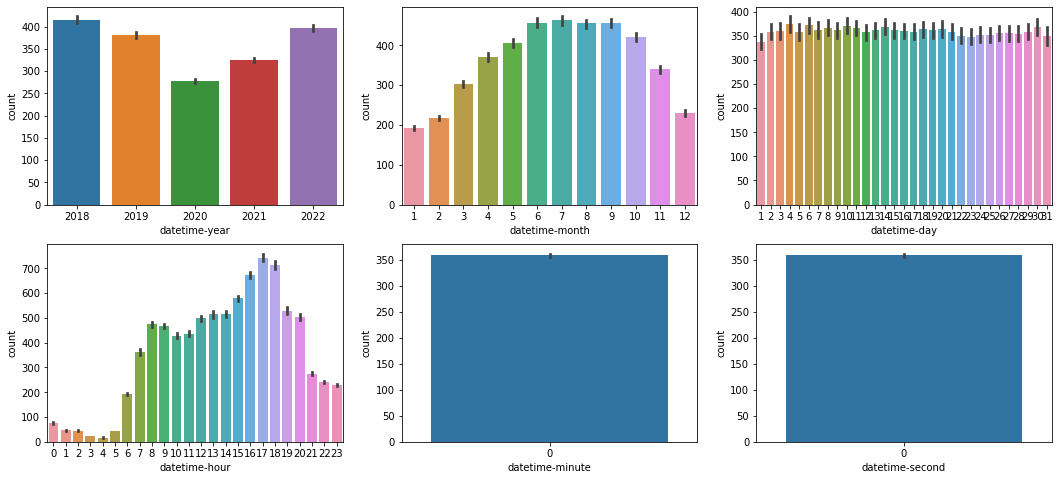

In [10]:
# 2 x 3의 형태로 시각화
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

# 그래프 사이즈 지정
figure.set_size_inches(18,8)

# subplots의 각 구역에 seabron의 barplot으로 시각화. ax에서 위치 지정
sns.barplot(data = train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data = train, x='datetime-month', y='count', ax=ax2)
sns.barplot(data = train, x='datetime-day', y='count', ax=ax3)
sns.barplot(data = train, x='datetime-hour', y='count', ax=ax4)
sns.barplot(data = train, x='datetime-minute', y='count', ax=ax5)
sns.barplot(data = train, x='datetime-second', y='count', ax=ax6)

### Q1-3) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?


**datetime-year**

* 2020년은 2019년에 비해 전년도 대비 큰 폭으로 대여량이 감소했습니다. 'Capital Bikeshare'도 코로나19의 영향을 받은 것으로 예상됩니다. 2020년 이후의 데이터는 코로나19에 대한 미국의 정책 변화나 사람들의 인식 및 행동 변화를 반영해서 시각화를 해석하는 게 좋겠습니다. 미국의 일일 코로나19 확진자 데이터나 관련 뉴스 기사를 참고하면 좋을 것 같습니다.
* 2020년 이후 다시 성장세를 보이며 2022년에는 코로나19 직전인 2019년의 수치만큼 회복했습니다.

**datetime-month**

* 여름(6-8월)의 대여량이 가장 많고 겨울(12-2월)의 대여량이 가장 적습니다.

**datetime-day**

* 일별에 따른 특별한 패턴을 찾을 수 없습니다. 모든 일의 평균이 전체 평균(359.6대)과 근사해 보입니다.

**datetime-hour**

* 새벽 시간대(0-5시)에는 자전거를 거의 빌리지 않습니다. 
* 출근 시간(6시) 이후부터 큰 폭으로 증가하고 퇴근 시간대 (16-18시)에 가장 두드러지는 패턴을 보입니다. 이 부분은 출퇴근 시간에 가장 많을 것이라는 예상과는 다릅니다. 주로 일과시간에 대여량이 많습니다.
* 밤 시간대인 23시와 0시 간 차가 커보입니다. 미국인의 생활패턴이나 편의시설, 대중교통 운영시간 등을 확인해서 원인을 파악해보는 게 좋을 것 같습니다.


**datetime-minute & datetime-second**

* 분, 초 모두 x축이 0일 때의 값만 존재합니다. 분, 초 단위로는 기록되지 않고 있다는 것을 알 수 있습니다.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 어떤 방향으로 마케팅을 제안할 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

### Q1-4) 이 사실을 통해 어떤 제안을 할 수 있을까요? 최소 3가지 아이디어를 내보세요.


1. 측정되고 있지 않은 `datetime-minute`과 `datetime-second` 컬럼과 특별한 인사이트를 찾을 수 없었던 `datetime-day` 컬럼은 제외해야 할 것입니다.

2. 2022년에는 코로나19의 회복과 재택근무 감소로 인해 총대여량이 많이 회복됐습니다. 복귀 유저를 위한 프로모션(할인 쿠폰 등)을 진행하면 좋을 것 같습니다.

3. datetime이 시계열 데이터인만큼 이 컬럼에서 발견한 인사이트를 활용해 타임딜 마케팅을 진행해보면 좋겠습니다.
    1) 출근 시간대(7-9시)가 퇴근 시간대(16-18시)보다 대여량이 적은 것은 예상하지 못한 사실입니다. 설문조사나 FGI(Focus Group Interview)를 통해서 그 이유를 파악해보면 좋을 것 같습니다. 만약 출근 시간대 이용률이 저조한 이유가 체력 때문이라면, '갓생'을 컨셉으로 한 '#출근라이딩챌린지' 같은 실행방안을 기획해 출근 시간대의 대여량을 늘려볼 수 있겠습니다.
    2) 대여량이 큰 폭으로 줄어드는 21시 이후 야간 라이딩 타임딜 마케팅을 진행해 할인된 가격으로 자전거를 이용하도록 할 수 있습니다.

---

## weather 컬럼 분석

그 다음 분석하고 싶은 컬럼은 날씨를 나타내는 `weather` 컬럼입니다. 이 컬럼을 다음의 값을 가지며, 구체적인 설명은 다음과 같습니다.

* 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
* 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
* 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
* 4: 아주 많은 비가 오거나 우박이 내립니다.

이 데이터를 엑셀 분석, 내지는 시각화하여 weather에 따라 자전거 대여량이 어떻게 변하는지 살펴보도록 하겠습니다.

### Q2-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 값이 숫자(1, 2, 3, 4)로 구분되어 있지만 수의 높고 낮은 관계가 없을 것입니다. 따라서 범주형 데이터(Categorical Data)로 처리해야 할 것입니다.
2. 궂은 날씨일수록 대여량이 적을 것입니다. 특히 4(아주 많은 비 또는 우박)의 경우일 때 1(깨끗한 날씨)의 경우보다 대여량이 적을 것입니다.
3. 강수 여부로 1(깨끗한 날씨)과 2(약간의 안개와 구름), 3(약간의 눈, 비 또는 천둥)과 4(아주 많은 비)로 구분지을 수 있을 것입니다. 대체적으로 비가 오지 않을 때 대여량이 더 많을 것입니다.

### Q2-2) 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

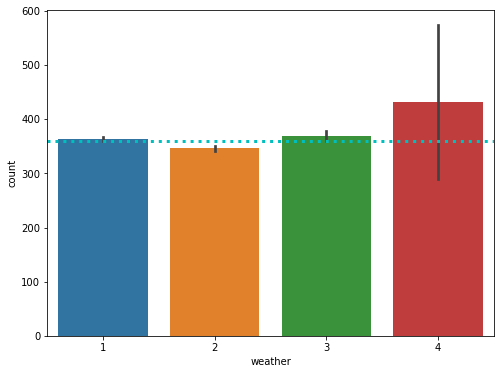

In [213]:
plt.figure(figsize=(8,6))

sns.barplot(data=train, x='weather', y='count')
plt.axhline(y=train['count'].mean(), color='c', linewidth=3, linestyle=':')

In [14]:
# weather별 데이터 개수를 확인합니다. 예상대로 불균형 데이터입니다. 4의 케이스가 매우 적습니다.

pd.DataFrame(train.weather.value_counts()).T

,1,2,3,4
weather,27986,11889,3929,20


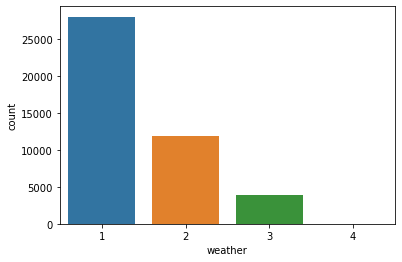

In [15]:
sns.countplot(data=train, x='weather'); plt.show()

In [12]:
# 강수여부를 알 수 있는 'precipitation' 변수를 새로 만듭니다. 강수여부 기준은 weather 컬럼 설명을 기반으로 합니다.
# weather가 1, 2일 때 precipitation은 0(강수 없음)으로 표시됩니다. weather가 3, 4일 때 precipitation은 1(강수 있음)로 표시됩니다.


# where 함수를 사용하기 위해 numpy 패키지를 불러옵니다.
import numpy as np

# np.where로 조건과 참, 거짓일 경우의 값을 지정합니다. 엑셀의 if 함수 사용법과 유사합니다.
# weather가 2 이하일 때(1, 2) 0, 그 외의 경우(3, 4)를 1로 지정합니다.
train['precipitation'] = np.where(train.weather <= 2, 0, 1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,precipitation
0,2018-01-01 00:00:00,4,1,0,1,9.84,14.395,67.0,0.0,7,41,48,2018,1,1,0,0,0,0
1,2018-01-01 01:00:00,4,1,0,1,9.02,13.635,53.0,0.0,11,38,49,2018,1,1,1,0,0,0
2,2018-01-01 02:00:00,4,1,0,1,9.02,13.635,67.0,0.0,7,43,50,2018,1,1,2,0,0,0
3,2018-01-01 03:00:00,4,1,0,1,9.84,14.395,70.0,0.0,6,30,36,2018,1,1,3,0,0,0
4,2018-01-01 04:00:00,4,1,0,1,9.84,14.395,73.0,0.0,6,30,36,2018,1,1,4,0,0,0


In [210]:
train.groupby('precipitation').mean()[['count']].round(2).T

precipitation,0,1
count,358.62,369.98


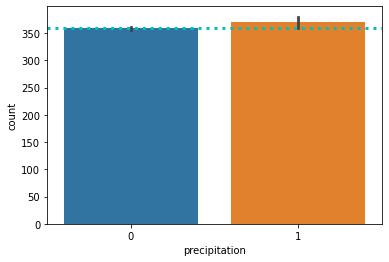

In [13]:
sns.barplot(data=train, x='precipitation', y='count')
plt.axhline(y=train['count'].mean(), color='c', linewidth=3, linestyle=':')

### Q2-3) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

**weather**

* 비가 아주 많이 올 때(weather=4)의 대여량이 가장 높은 것처럼 보입니다. 하지만 신뢰구간의 길이와 전체 평균선의 위치를 고려했을 때 데이터의 불균형으로 인한 것으로 추측됩니다.
* 4를 제외하고 봐도 날씨에 따른 대여량의 차이는 거의 없어 보입니다.

**precipitation**

* 예상과 다르게 눈, 비가 올 때도 그러지 않은 날만큼 자전거를 이용합니다. 오히려 강수가 있을 때의 평균이 근소하게 더 높습니다.

### Q2-4) 이 사실을 통해 어떤 제안을 할 수 있을까요? 최소 3가지 아이디어를 내보세요.


1. 자전거를 대여하는 데에 있어서 사람들은 날씨의 영향을 크게 받지 않습니다. 강수 여부에 따른 차이도 거의 없습니다. 비 올 때 우산을 잘 쓰지 않는 미국 문화의 영향인 것으로 추측됩니다. 따라서 날씨 컬럼은 이용하지 않는 것이 좋겠습니다.

---

## windspeed 컬럼 분석

그 다음 분석하고 싶은 컬럼은 풍속을 나타내는 `windspeed` 컬럼입니다. 이 컬럼은 0에서 56까지의 값을 가집니다. 이 데이터도 시각화해보도록 하겠습니다.

### Q3-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. windspeed는 연속형 데이터(Continuous Data)로 처리해야 할 것입니다. 정규분포(Normal Distribution)이겠지만 실생활 데이터기 때문에 그 형태가 완벽하진 않을 것으로 예상합니다.

2. 일반적으로 사람들이 외출할 때 풍속까지 확인하는 경우는 드물기 때문에 풍속에 따른 대여량의 변화 패턴을 파악하기 쉽지 않을 것입니다.

3. 히지만 계절별로 나눠서 본다면 풍속에 따른 대여량에 차이가 있을 수 있겠습니다. 봄, 여름, 가을에 비해 추운 겨울에는 풍속이 셀 수록 체감온도에 큰 영향을 미치기 때문에 겨울에는 풍속이 셀수록 대여량이 감소할 것입니다.

### Q3-2) 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

C:\Users\hmkim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

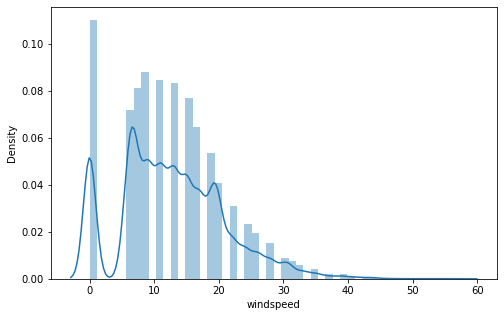

In [16]:
# KDE(커널밀도함수)를 함께 보여주는 distplot로 windspeed의 분포를 확인합니다.

plt.figure(figsize=(8,5))
sns.distplot(train.windspeed)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

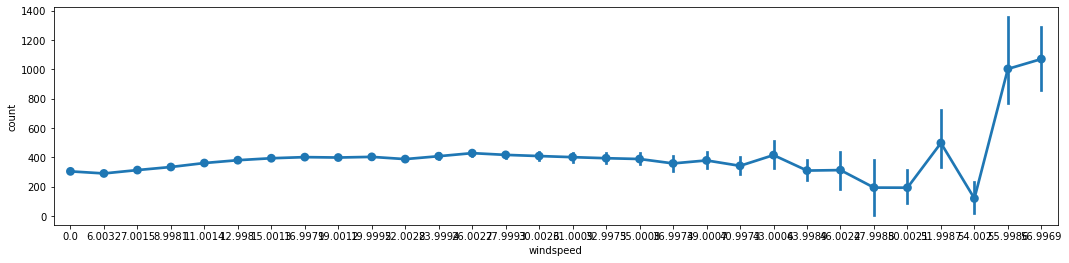

In [214]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x='windspeed', y='count')

<AxesSubplot:xlabel='windspeed', ylabel='count'>

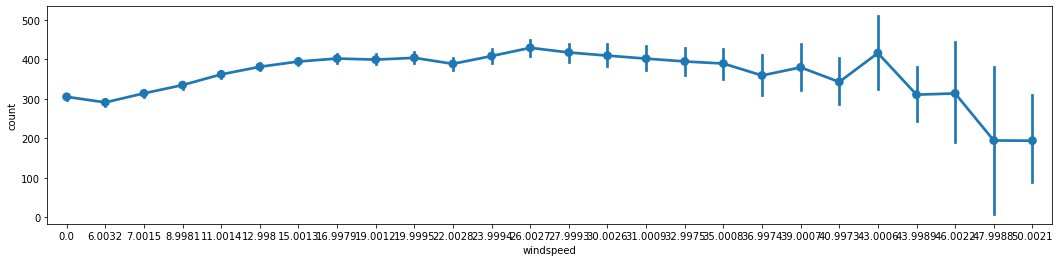

In [18]:
plt.figure(figsize=(18,4))

# 풍속이 아주 센 경우의 신뢰구간이 깁니다. 케이스가 적은 것으로 추정됩니다.
# 강풍 기준(50.4km/h) 이하의 데이터로만 더 자세한 추세를 확인해봅니다.
sns.pointplot(data=train[train.windspeed<=50.4], x='windspeed', y='count')

<AxesSubplot:xlabel='datetime-month', ylabel='windspeed'>

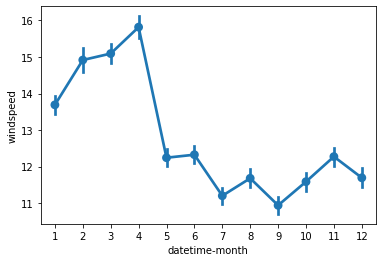

In [19]:
# 계절별 풍속에 따른 대여량을 확인하기 전, 월별 풍속을 대략적으로 확인합니다.
sns.pointplot(data=train, x='datetime-month', y='windspeed')

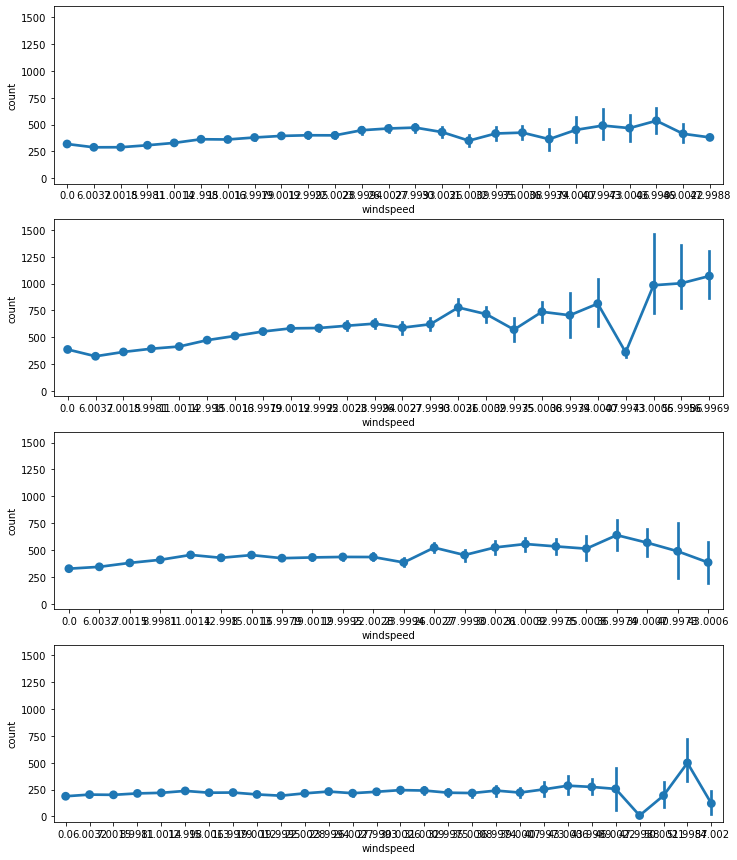

In [20]:
figure, ax = plt.subplots(nrows=4, ncols=1)
figure.set_size_inches(12,15)

# 계절별로 풍속에 따른 대여량의 변화를 확인합니다.
# 계절이 1, 2, 3, 4일 때의 결과를 ax[0], ax[1], ax[2], ax[3]의 위치에 표시합니다.
for i in range(4):
    sns.pointplot(data=train[train.season==i+1], x='windspeed', y='count', ax=ax[i])
    ax[i].set_ylim([-50,1600])

In [21]:
# windspeed의 고유값을 확인해보면 전체 데이터의 개수(43,824개)에 비해 종류가 매우 적습니다.
# 또한 소수점 아래 자리수가 길어 한눈에 들어오지 않습니다.
sorted(train.windspeed.unique())

[0.0,
 6.0032,
 7.0015,
 8.9981,
 11.0014,
 12.998,
 15.0013,
 16.9979,
 19.0012,
 19.9995,
 22.0028,
 23.9994,
 26.0027,
 27.9993,
 30.0026,
 31.0009,
 32.9975,
 35.0008,
 36.9974,
 39.0007,
 40.9973,
 43.0006,
 43.9989,
 46.0022,
 47.9988,
 50.0021,
 51.9987,
 54.002,
 55.9986,
 56.9969]

[0.    0.003 0.998 0.001 1.    0.998 0.001 0.998 0.001 0.003 0.003 0.999
 0.999 0.003 0.002 0.998 0.997 0.001 0.001 0.001 0.999 0.997 0.999 0.002
 0.002 0.001 0.002 0.997 0.999 0.999]


C:\Users\hmkim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed(point)', ylabel='Density'>

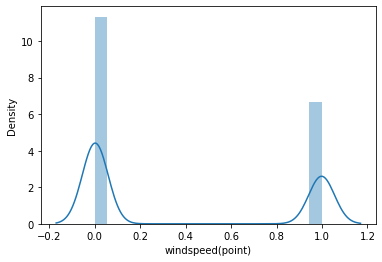

In [22]:
# 소수점을 어떻게 전처리할지 결정하기 위해 소수점의 분포만 별도로 확인해보겠습니다.
# 소수점만 따로 계산한 'windspeed(point)' 컬럼을 만듭니다.
train['windspeed(point)'] = train.windspeed - train.windspeed.astype('int')

# 확인하기 쉽게 소수점 아래 3번째 자리에서 반올림합니다.
print(train['windspeed(point)'].unique().round(3))

# distplot으로 소수점의 분포를 확인합니다.
sns.distplot(train['windspeed(point)'])

### Q3-3) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1. 히스토그램이 연속적이지 않고 끊겨 있습니다. 측정 오류인지 확인해볼 필요가 있겠습니다. 만약 실제로 이러한 데이터라면 범주형 데이터(Categorical Data)로 구간을 나누어 확인해봐야 합니다.

2. 특이하게도 windspeed가 0인 경우가 매우 많습니다. 그리고 그 다음 값은 6.0032부터 시작합니다.

3. 전체적으로 봤을 때 풍속에 따른 대여량의 차이가 커 보이지 않습니다. 다만, 바람이 적당히 부는 때가 바람이 적을 때, 많을 때보다 미세하게 대여량이 더 높은 것으로 보입니다.

4. 계절별로 확인하면 예상과 다르게 겨울에도 풍속에 따른 영향이 미미합니다. 월별 풍속을 확인하면 겨울이 오히려 봄보다 풍속이 느린 편입니다.

### Q3-4) 이 사실을 통해 어떤 제안을 할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. windspeed의 경우 0인 데이터가 아주 많습니다. 실제로 바람이 불지 않았을 수도 있지만 측정되지 못한 NaN(Not a Number) 값일 수도 있겠습니다. 또한 연속적이지 못하고 듬성듬성한 형태의 분포를 보이며 값의 종류가 데이터 개수에 비해 적습니다. `windspeed`를 마케팅에 활용하기 전에 측정상 오류가 있는지 확인해 볼 필요가 있습니다.

2. 소수점을 살펴봤을 때, 0.001, 0.003이나 0.998, 0.999가 대부분입니다. 이 경우, 실수형(int)로 반올림하면 데이터를 파악하기에 더 편할 것입니다.

3. 마케팅 실행방안에 적용한다면 풍속을 중요하게 고려할 필요는 없어 보입니다. 하지만 단기적인 프로모션을 진행할 때 더 세세한 타겟팅을 원한다면 적당한 바람이 부는 날(25km/h = 7m/s 내외)로 정하는 게 좋겠습니다.

---

## temp 컬럼 분석

이번에 분석할 데이터는 온도 (`temp`) 컬럼입니다. 이 데이터는 유사한 개념인 체감온도(`atemp`)와 함께 시각화하여 살펴보도록 하겠습니다.

### Q4-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. `windspeed`와 마찬가지로 연속형 데이터(Continuous Data)이며, 정규분포에 가까운 형태를 띌 것입니다.

2. 기온이 높을수록 대여량이 증가하는 추세를 보일 것 같습니다. 그중에서도 야외활동하기에 좋은 적당한 기온(관광점수 기준 18°C에서 27°C사이)일 때의 대여량이 많을 것으로 예상합니다.

3. 기온(`temp`)는 체감온도(`temp`)와의 상관관계가 높습니다. 사실상 비슷한 분포를 보이겠으나 날씨가 너무 더울 때나 추울 때 그렇지 않은 날보다 그 차이가 클 것입니다. 따라서 `temp`와 `atemp`의 차이가 적을수록 대여량이 높을 것입니다.

### Q4-2) 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

C:\Users\hmkim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hmkim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='atemp', ylabel='Density'>

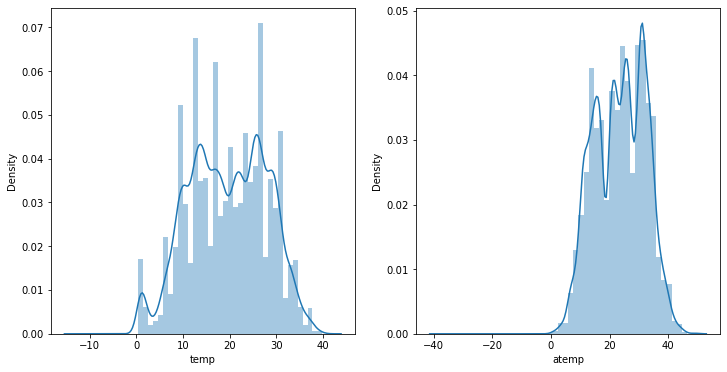

In [23]:
figure, ax = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(12,6)

# 'temp'와 'atemp'의 분포를 확인합니다.
sns.distplot(train.temp, ax=ax[0])
sns.distplot(train.atemp, ax=ax[1])

<AxesSubplot:xlabel='temp', ylabel='atemp'>

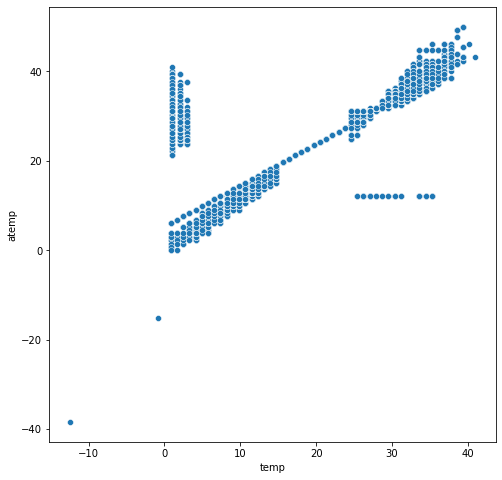

In [89]:
# seaborn의 lmplot으로 온도(temp)와 체감온도(atemp)의 상관관계를 시각화합니다.
# 몇몇의 이상치를 제외하면 높은 상관관계를 보입니다.

plt.figure(figsize=(8,8))
sns.scatterplot(data=train, x='temp', y='atemp')

<AxesSubplot:xlabel='datetime-month', ylabel='temp'>

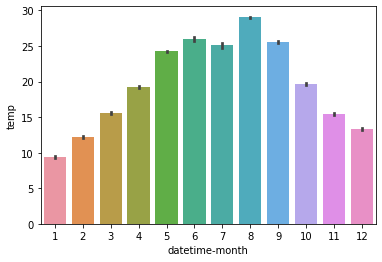

In [25]:
# 월별 평균 기온을 확인합니다.
sns.barplot(data=train, x='datetime-month', y='temp')

In [26]:
# temp의 고유값 종류가 많지 않습니다.
train.temp.unique()

array([  9.84,   9.02,   8.2 ,  13.12,  15.58,  14.76,  17.22,  18.86,
        18.04,  16.4 ,  13.94,  12.3 ,  10.66,   6.56,   5.74,   7.38,
         4.92,  11.48,   4.1 ,   3.28,   2.46,   1.64,   0.82,  21.32,
        22.96,  23.78,  24.6 ,  19.68,  22.14,  20.5 ,  27.06,  26.24,
        25.42,  27.88,  28.7 ,  30.34,  31.16,  29.52,  31.98,  33.62,
        32.8 ,  35.26,  36.08,  36.9 ,  34.44,  37.72,  38.54,  39.36,
       -12.5 ,   1.  ,   2.  ,   3.  ,  -0.9 ,  40.18,  41.  ])

In [27]:
# atemp의 고유값 종류가 많지 않습니다.
train.atemp.unique()

array([ 14.395     ,  13.635     ,  12.88      ,  17.425     ,
        19.695     ,  16.665     ,  21.21      ,  22.725     ,
        21.97      ,  20.455     ,  11.365     ,  10.605     ,
         9.85      ,   8.335     ,   6.82      ,   5.305     ,
         6.06      ,   9.09      ,  12.12      ,   7.575     ,
        15.91      ,   3.03      ,   3.79      ,   4.545     ,
        15.15      ,   1.515     ,   2.275     ,   0.        ,
         0.76      ,  18.18      ,  25.        ,  26.515     ,
        27.275     ,  29.545     ,  23.485     ,  25.76      ,
        31.06      ,  30.305     ,  24.24      ,  18.94      ,
        31.82      ,  32.575     ,  33.335     ,  28.79      ,
        28.03      ,  34.09      ,  34.85      ,  37.12      ,
        38.635     ,  37.88      ,  36.365     ,  35.605     ,
        40.15      ,  39.395     ,  41.665     ,  40.91      ,
        42.425     ,  43.94      ,  43.18      ,  44.695     ,
        46.21      ,  45.455     ,  47.725     ,  49.24

<AxesSubplot:xlabel='temp(int)', ylabel='count'>

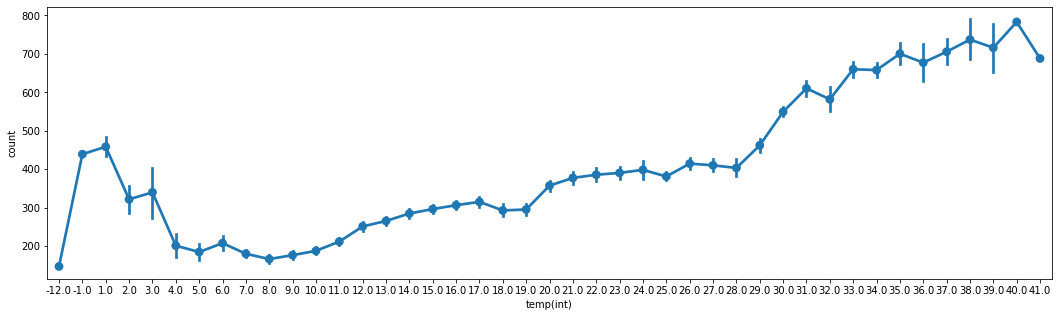

In [28]:
# 분석의 편의성을 위하여 온도와 체감온도를 반올림하여 각각 'temp(int)', 'atemp(int)'로 저장합니다.
train['temp(int)'] = train.temp.round()
train['atemp(int)'] = train.atemp.round()

plt.figure(figsize=(18,5))

sns.pointplot(data=train, x='temp(int)', y='count')

<AxesSubplot:xlabel='temp(difference)', ylabel='count'>

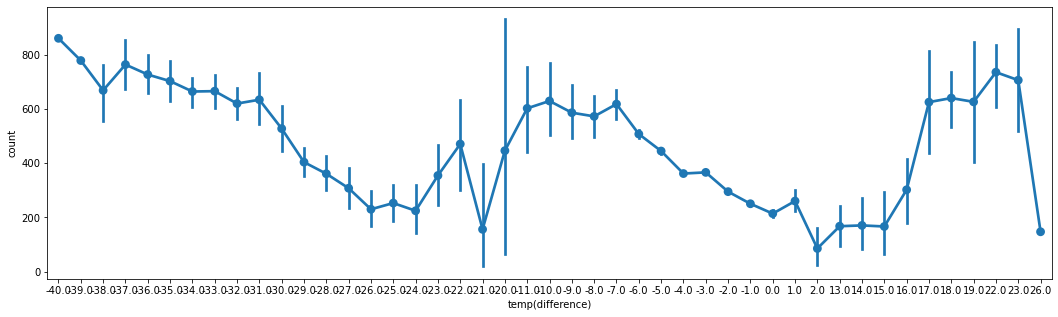

In [29]:
# 기온과 체감온도 간의 차이를 확인하기 위해서 'temp(difference)' 컬럼을 생성합니다.
train['temp(difference)'] = train['temp(int)'] - train['atemp(int)']

# 신뢰구간이 긴 부분이 많아 패턴을 파악하기 어렵습니다.
plt.figure(figsize=(18,5))
sns.pointplot(data=train, x='temp(difference)', y='count')

In [30]:
train['temp(difference)'].value_counts().sort_index()

-40.0        1
-39.0        1
-38.0       16
-37.0       30
-36.0       34
-35.0       33
-34.0       39
-33.0       96
-32.0       78
-31.0       54
-30.0       64
-29.0      165
-28.0       90
-27.0       67
-26.0       84
-25.0       65
-24.0       40
-23.0       26
-22.0       16
-21.0        6
-20.0        3
-11.0       12
-10.0       12
-9.0        24
-8.0        56
-7.0        97
-6.0      1440
-5.0      3774
-4.0     19663
-3.0      8330
-2.0      5861
-1.0      2415
 0.0       974
 1.0        97
 2.0        11
 13.0        2
 14.0       11
 15.0        6
 16.0        6
 17.0        2
 18.0        6
 19.0        2
 22.0       10
 23.0        4
 26.0        1
Name: temp(difference), dtype: int64

In [31]:
# 특정 구간의 값은 모수가 적기 때문에 합쳐줍니다.
# -7 이하의 데이터는 -7로, 0 이상의 데이터는 0으로 바꿉니다.
train['temp(difference)-new'] = train['temp(difference)']
train.loc[train['temp(difference)'] <= -6, 'temp(difference)-new'] = -6
train.loc[train['temp(difference)'] >= 0, 'temp(difference)-new'] = 0

train['temp(difference)-new'].value_counts().sort_index()

-6.0     2649
-5.0     3774
-4.0    19663
-3.0     8330
-2.0     5861
-1.0     2415
 0.0     1132
Name: temp(difference)-new, dtype: int64

<AxesSubplot:xlabel='temp(difference)-new', ylabel='count'>

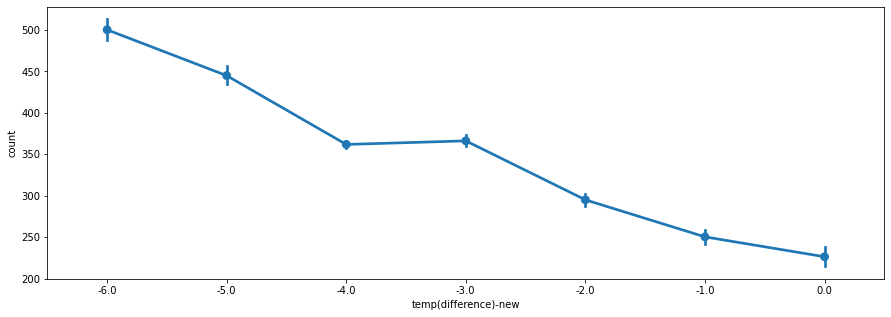

In [119]:
plt.figure(figsize=(15,5))
sns.pointplot(data=train, x='temp(difference)-new', y='count')

### Q4-3) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1. 기온(`temp`)과 체감온도(`atemp`) 모두 연속형 데이터(Continuous Data)이며 상관관계가 높습니다.

2. 기온이 높을수록 대여량이 많아지는 경향이 있습니다. 하지만 예상과 다르게 야외활동하기에 좋은 적당한 기온(관광점수 기준 18℃에서 27℃사이)일 때 가장 두드러지지는 않았습니다.

3. 기온이 높거나 낮을수록 체감온도간의 차이가 커지는 것을 확인할 수 있습니다. 그리고 예상과 다르게 체감온도(`atemp`)와 기온(`temp`) 간의 차이가 클수록 대여량이 많아집니다.

### Q4-4) 이 사실을 통해 어떤 제안을 할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. 기온(`temp`)과 체감온도(`atemp`) 모두 연속형 데이터인 것에 비해 고유값의 종류가 많지 않습니다. 또한 기온과 체감온도의 차가 매우 큰 경우가 있습니다. 예를 들면 실제 기온은 1℃도이지만 체감기온이 28℃인 경우가 있습니다. 측정에 오류가 없었는지 한 번 더 체크하거나 추가적인 전처리를 진행할 필요가 있겠습니다.

2. 기온의 상승이 대여량에 유의미한 영향을 미치며 추가적으로 체감온도와 기온의 차 또한 대여량에 영향을 미친다는 사실을 알 수 있습니다. 분석량 예측 모델에 이 컬럼을 적용하면 성능을 향상시킬 수 있을 것입니다.

3. 일반적으로 야외활동을 하기 좋은 온화한 기온일 때(18℃~27℃, 기온과 체감온도 간 차이가 적을수록)의 대여량이 적습니다. 어쩌면 고객들의 숨겨진 니즈일 수도 있겠습니다. 나들이 가기 좋은 날 자전거 이용을 유도할 수 있도록 하는 카피라이팅으로 마케팅을 진행해봐도 좋을 것 같습니다.

---

## datetime-dayofweek 컬럼 분석

이번에 분석할 데이터는 요일을 나타내는 데이ㅓㅌ, 일명 `datetime-dayofweek` 입니다. 이 데이터는 현재 feature로 가지고 있지만, 날짜와 시간을 나타내는 `datetime` 컬럼에서 추출할 수 있습니다. (ex: `train["datetime"].dt.day_name()` ) 앞서 분석과 마찬가지로, 날짜 컬럼도 탐험적 데이터 분석을 통해 분석해 보겠습니다.

In [123]:
# train 데이터에 요일을 나타내는 새로운 컬럼을 생성합니다.
# 이 컬럼의 이름을 datetime-dayofweek이라고 가정합니다.
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 요일 정보를 따로 넣어줍니다.
train['datetime-dayofweek'] = train['datetime'].dt.day_name()

train[['datetime', 'datetime-dayofweek']]

,datetime,datetime-dayofweek
0,2018-01-01 00:00:00,Monday
1,2018-01-01 01:00:00,Monday
2,2018-01-01 02:00:00,Monday
3,2018-01-01 03:00:00,Monday
4,2018-01-01 04:00:00,Monday
...,...,...
43819,2022-12-31 19:00:00,Saturday
43820,2022-12-31 20:00:00,Saturday
43821,2022-12-31 21:00:00,Saturday
43822,2022-12-31 22:00:00,Saturday


### Q5-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 요일(`datetime-dayofweek`)과 유사한 성향의 컬럼인 근무일(`workingday`)이 있습니다. 대체적으로 근무일이 1이면 평일, 0이면 주말입니다. 사람들의 일반적인 생활패턴을 고려해보면 평일과 주말의 시간대별 대여량 패턴이 다를 것입니다.

2. 요일에 따른 시간대별 대여량을 확인하면 근무일 여부만 확인했을 때보다 더 자세한 인사이트를 얻을 수 있을 것입니다. 평일 중에서도 더 두드러지는 요일이 있을 수 있겠습니다.

3. 앞서 Q1)에서 Capital Bikeshare도 코로나19의 타격을 받은 것으로 확인됐습니다. 따라서 연도별로도 요일별 패턴이 다르게 나타날 것입니다.

### Q5-2) 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

<AxesSubplot:xlabel='datetime-dayofweek', ylabel='count'>

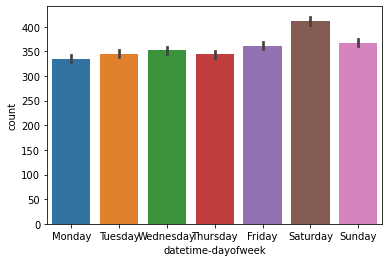

In [128]:
sns.barplot(data=train, x='datetime-dayofweek', y='count')

<AxesSubplot:xlabel='datetime-hour', ylabel='count'>

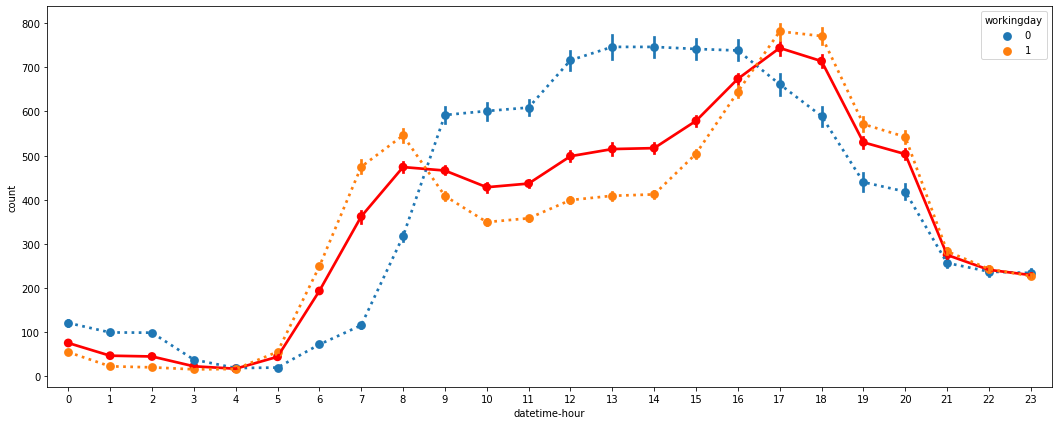

In [164]:
plt.figure(figsize=(18,7))

# 빨간색 실선은 전체 대여량을 나타냅니다.
sns.pointplot(data=train, x='datetime-hour', y='count', color='r')

# 주황색 점선은 근무일일 때, 파란색 점선은 근무일이 아닐 때의 대여량을 나타냅니다.
sns.pointplot(data=train, x='datetime-hour', y='count', hue='workingday', linestyles=':')

<AxesSubplot:xlabel='datetime-hour', ylabel='count'>

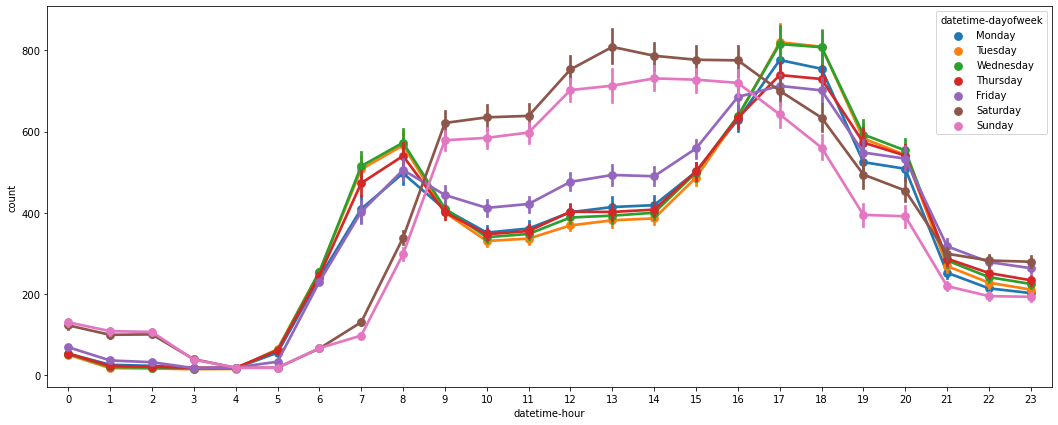

In [137]:
plt.figure(figsize=(18,7))
sns.pointplot(data=train, x='datetime-hour', y='count', hue='datetime-dayofweek')

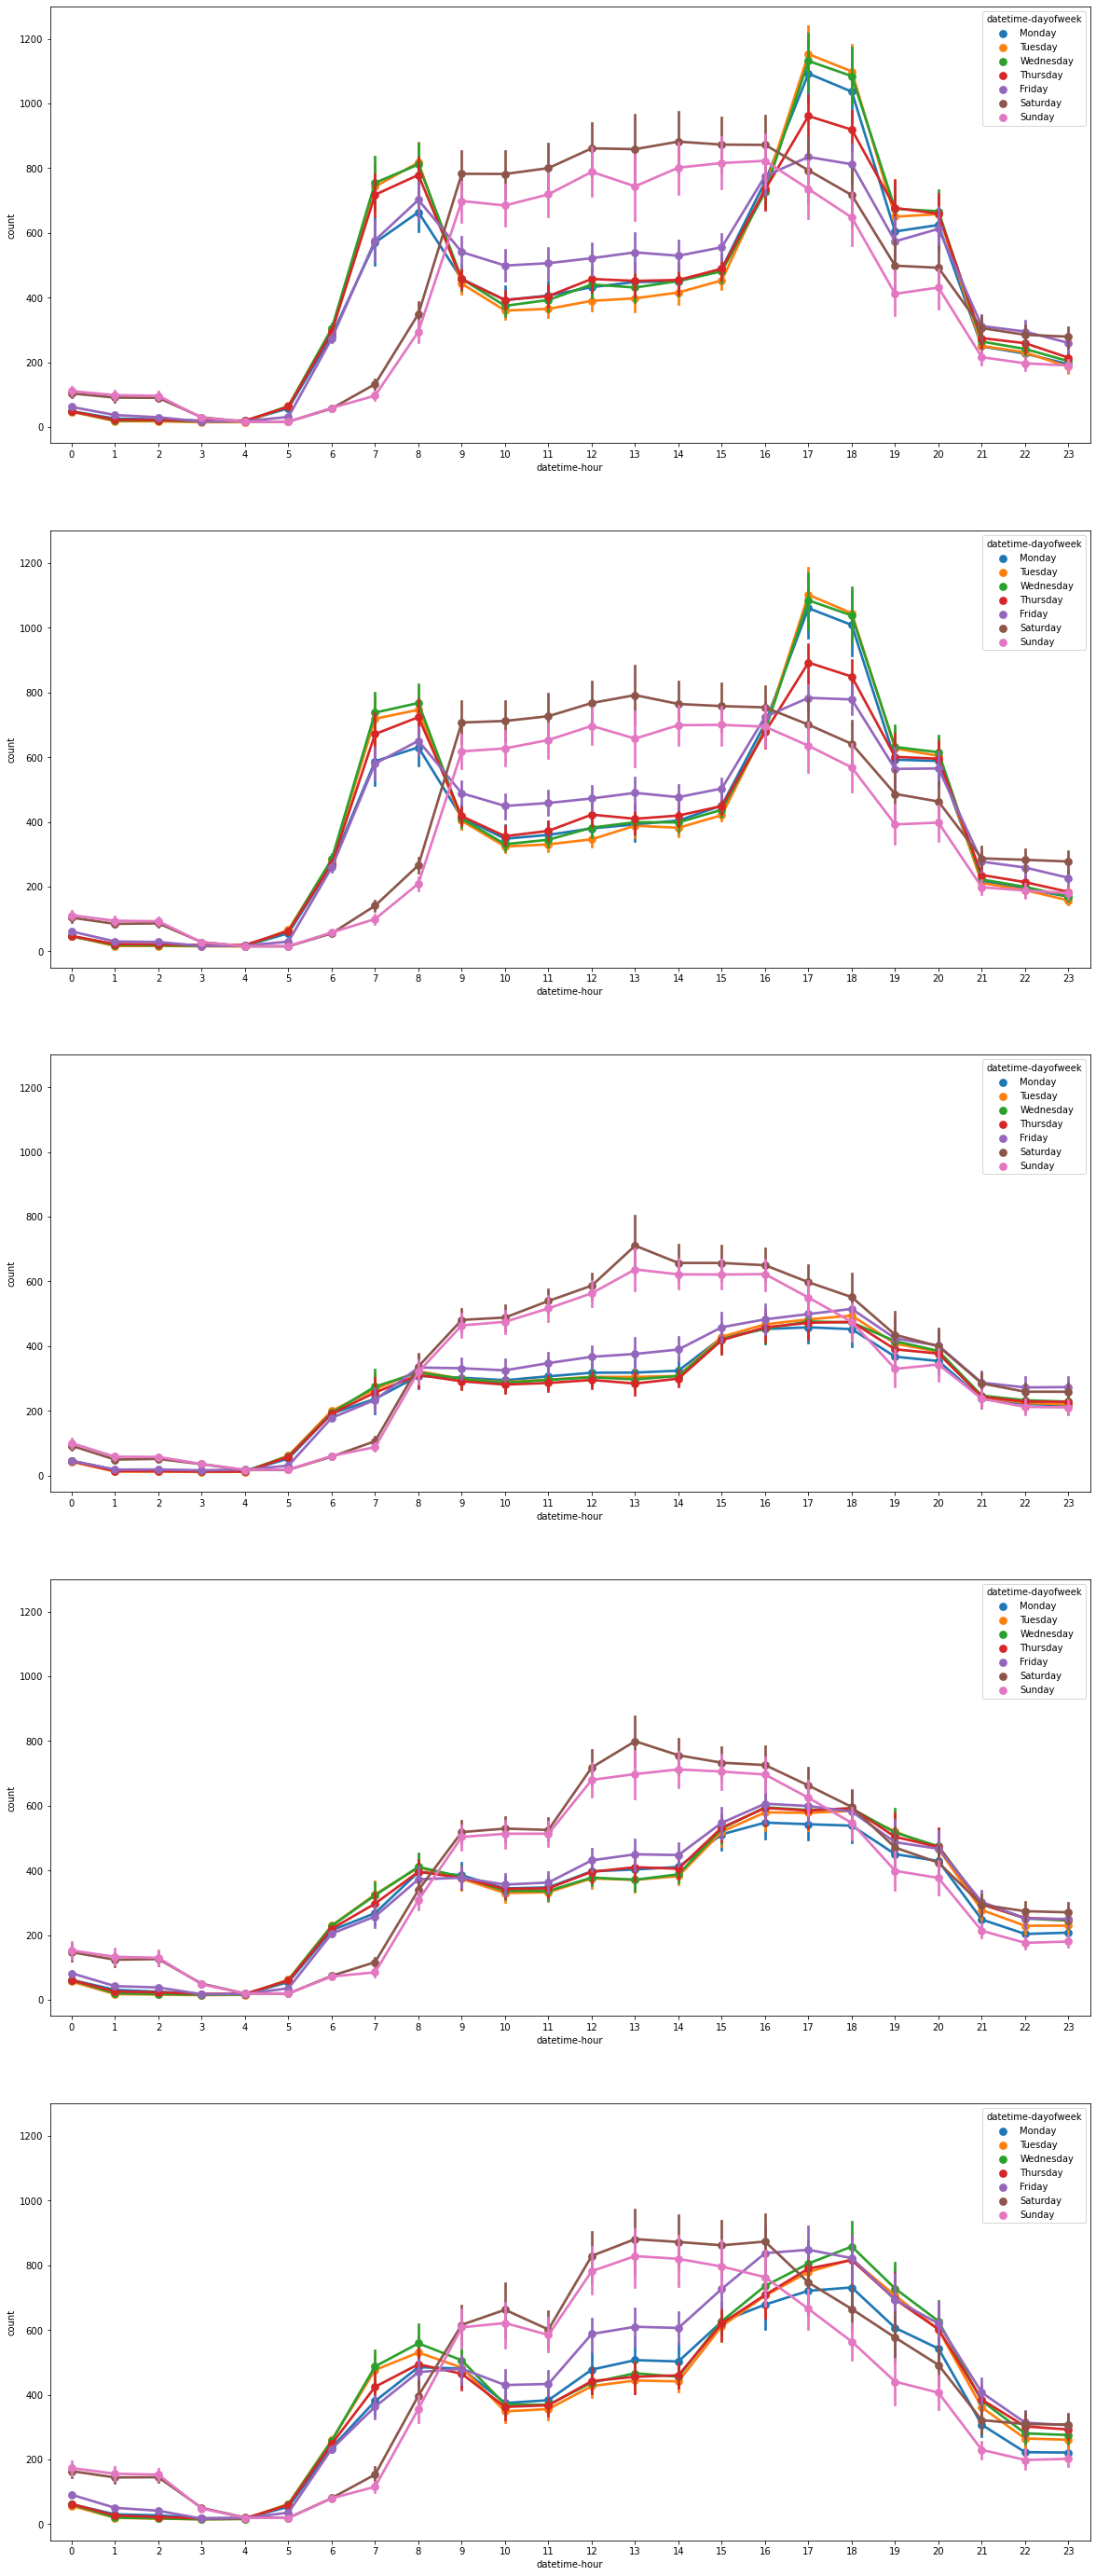

In [165]:
figure, ax = plt.subplots(nrows=5, ncols=1)

figure.set_size_inches(20,50)

# 시각화할 때 요일의 순서를 명확하게 지정하기 위해, 월~일요일까지의 영어 호칭을 리스트로 저장합니다.
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 2018년부터 2022년까지의 데이터를 순서대로 표시합니다.
for i in range(5):
    sns.pointplot(data=train[train['datetime-year']==2018+i], x='datetime-hour', y='count', hue='datetime-dayofweek',
                  ax=ax[i], hue_order=dayofweek_order)
    ax[i].set_ylim([-50, 1300])

### Q5-3) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1. 예상대로 평일은 출퇴근 시간대, 주말은 오후 시간대에 두드러지는 성향을 보입니다. 같은 주말이라도 전체 시간에서 토요일이 일요일보다 대여량이 더 많습니다. 그리고 특이하게도 코로나19가 발생한 2020년 이후에도 주말은 비슷한 패턴을 보입니다.

2. 월요일은 평일 중 출근 시간대 대여량이 낮은 편이고 퇴근 시간대에는 화, 수, 목요일과 비슷한 수준입니다. 금요일 또한 출퇴근 시간대 대여량이 평일 중 낮은 편이며, 오후 시간대에는 평일 중 가장 많습니다. 이는 휴일의 영향으로 금요일부터 월요일 오전까지 주말과 비슷한 성향을 띄는 것으로 보여집니다.

3. 코로나19가 발생한 2020년부터 평일 출퇴근 시간대의 대여량이 급격하게 감소했습니다. 하지만 해가 지날수록 코로나19 이전만큼의 출퇴근 시간대 패턴 모양으로 회복하는 것으로 보입니다.

### Q5-4) 이 사실을 통해 어떤 제안을 할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. 요일별로 확인했을 때 세부적으로 시간대를 타겟팅할 만한 요소가 보입니다. 1) 월, 금요일의 출근 시간대 대여량이 적음. 2) 오후 시간대는 금요일에 대여량이 평일 중 많은 편. 화~목요일의 대여량이 가장 적음. 3) 금요일의 퇴근 시간대 대여량이 적음. 4) 주말 중 일요일의 대여량이 더 낮음. 목적에 맞게 해당 인사이트를 이용해서 프로모션을 진행하면 좋을 것 같습니다. 

2. 주말의 패턴은 코로나19의 영향을 크게 받지 않았습니다. 주말 이용자의 성향을 추가적으로 확인해보면 좋을 것 같습니다.

3. 2022년의 전체 대여량은 2019년 수준만큼 회복했기 때문에 추후 평일 위주로  프로모션을 진행해서 대여량을 더 늘려볼 수 있겠습니다.

---

## casual & registered 컬럼 분석

이번에 분석할 데이터는 비회원과 회원을 나타내는 데이터, `casual`과 `registered` 컬럼입니다. 이 컬럼을 자전거 대여량을 나타내는 `count` 컬럼과 거의 유사합니다. (실제로 `casual` 컬럼값과 `registered` 컬럼값을 더하면 `count` 컬럼값이 나옵니다)


### Q6-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 회원(`registered`)과 비회원(`casual`)은 자전거를 대여하는 목적이 다르기 때문에 시간별, 연도별 등에 따른 특징이 다를 것으로 예상합니다.

2. 하지만 비회원(`casual`)은 비정기적으로 이용하는 경우가 많기 때문에 패턴을 파악하기 어려울 것입니다.

3. 회원(`registered`)들은 어떤 목적을 가지고 자전거를 정기적 또는 장기적으로 이용하고자 하는 고객이기 때문에 연도별로 비슷한 패턴을 보일 것입니다. 하지만 그 목적이 코로나19와 관련이 있는지 확인해봐야 할 것입니다.



### Q6-2) 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

(0.0, 450.0)

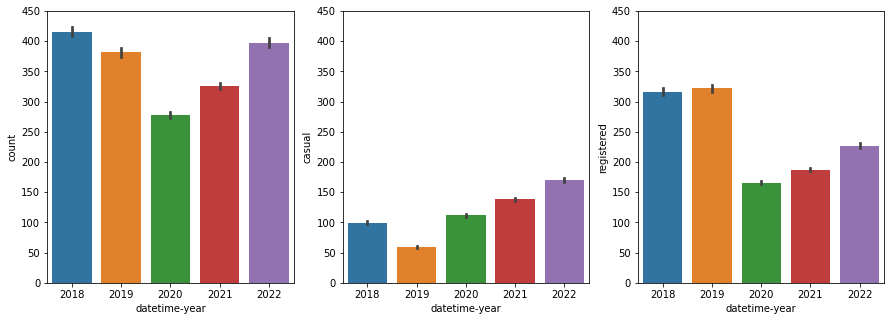

In [183]:
# 코로나 떼 registered가 확 떨어짐
# 반면 casual은 코로나 때 오히려 증가,,
figure, ax = plt.subplots(nrows=1, ncols=3)

figure.set_size_inches(15,5)


sns.barplot(data=train, x='datetime-year', y='count', ax=ax[0])
sns.barplot(data=train, x='datetime-year', y='casual', ax=ax[1])
sns.barplot(data=train, x='datetime-year', y='registered', ax=ax[2])

ax[0].set_ylim([0, 450])
ax[1].set_ylim([0, 450])
ax[2].set_ylim([0, 450])

<AxesSubplot:xlabel='datetime-year'>

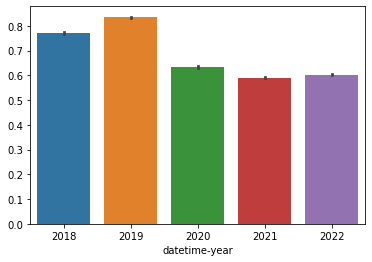

In [215]:
# 연도별 회원의 비율 시각화
sns.barplot(data=train, x='datetime-year', y=train.registered/train['count'])

<AxesSubplot:xlabel='datetime-hour', ylabel='registered'>

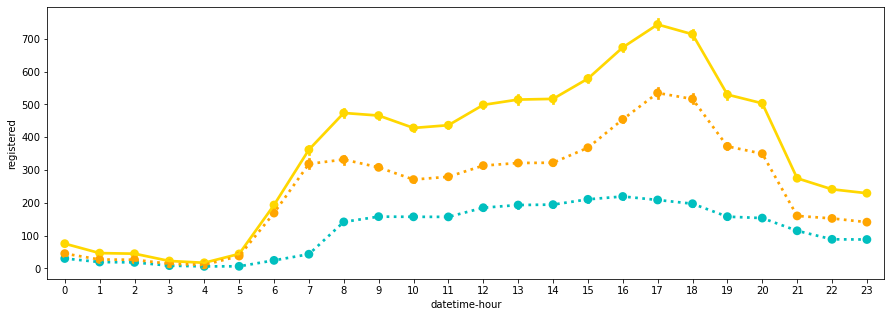

In [207]:
# register이 평일 패턴과 비슷해 보임

plt.figure(figsize=(15,5))

sns.pointplot(data=train, x='datetime-hour', y='count', color='gold')
sns.pointplot(data=train, x='datetime-hour', y='casual', color='c', linestyles=':')
sns.pointplot(data=train, x='datetime-hour', y='registered', color='orange', linestyles=':')

<AxesSubplot:xlabel='datetime-hour', ylabel='registered'>

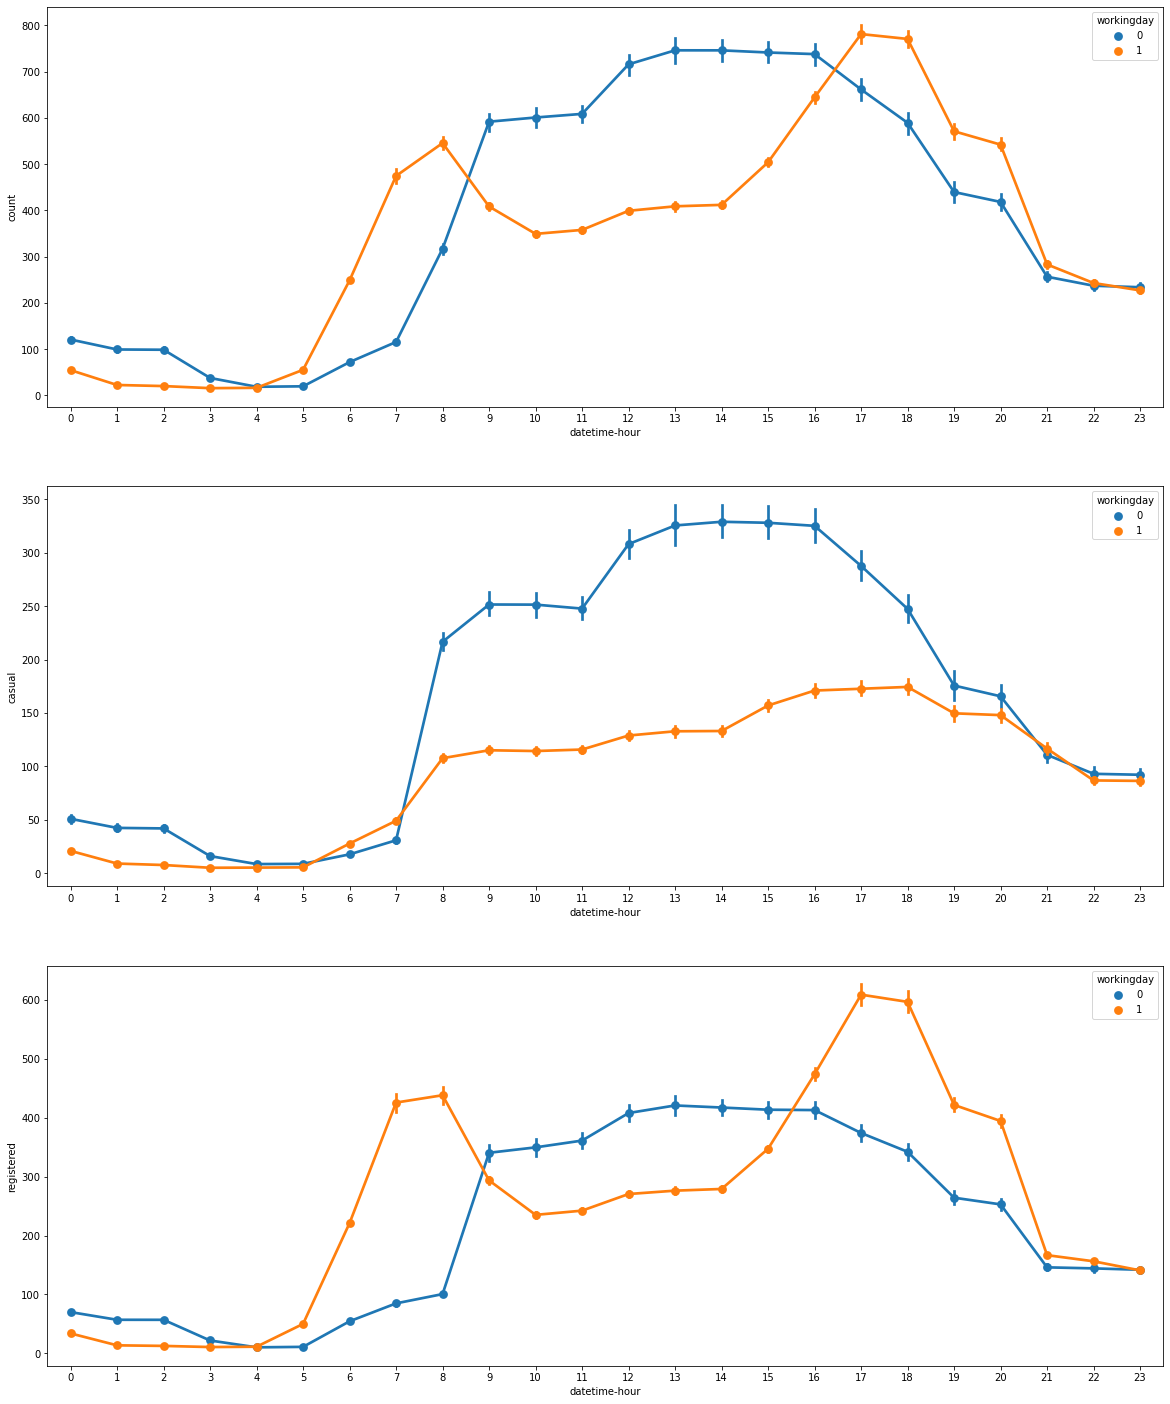

In [193]:
# casual은 근무일 상관 없이 패턴이 비슷
# registered는 출퇴근 때 사용
figure, ax = plt.subplots(nrows=3, ncols=1)

figure.set_size_inches(20,25)

sns.pointplot(data=train, x='datetime-hour', y='count', ax=ax[0], hue='workingday')
sns.pointplot(data=train, x='datetime-hour', y='casual', ax=ax[1], hue='workingday')
sns.pointplot(data=train, x='datetime-hour', y='registered', ax=ax[2], hue='workingday')

<AxesSubplot:xlabel='datetime-hour', ylabel='registered'>

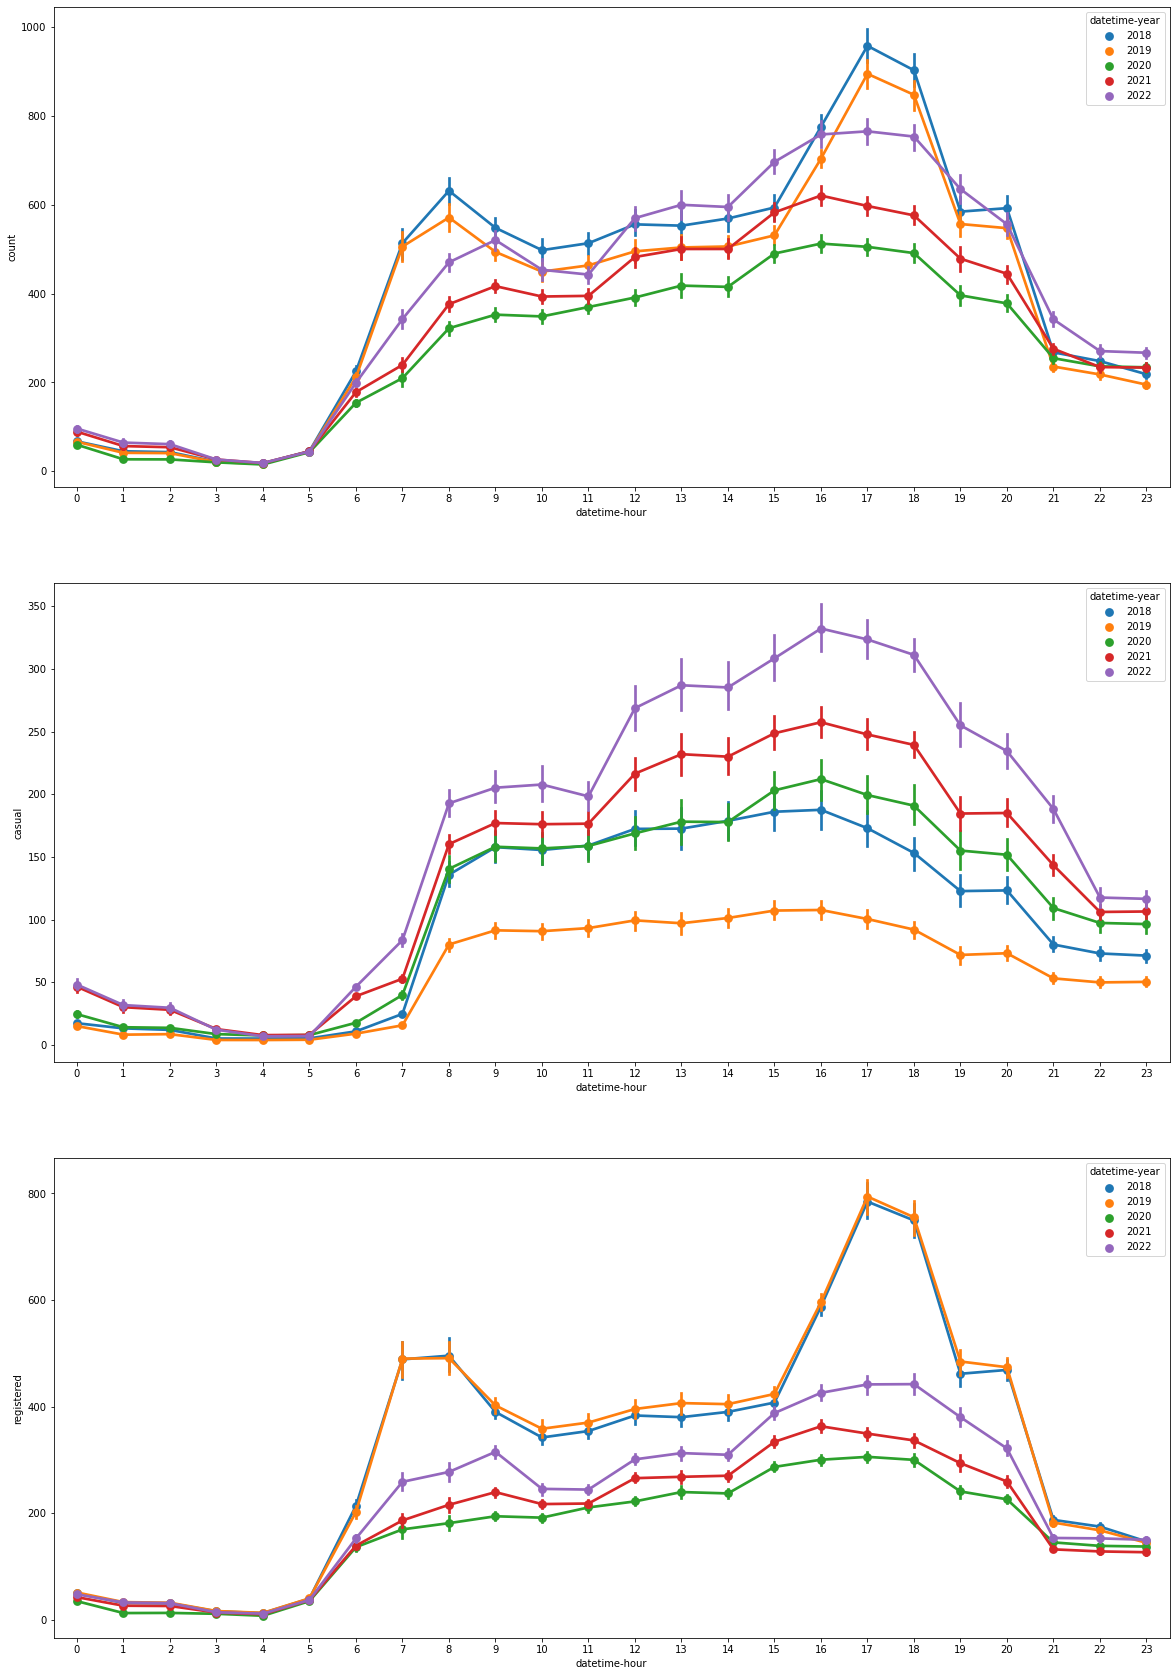

In [199]:
# 연도별로 파악
# casual은 연도별 패턴이 비슷
# registered는 18, 19 비슷 하지만 코로나 이후 출퇴근 급감.
figure, ax = plt.subplots(nrows=3, ncols=1)

figure.set_size_inches(20,30)

sns.pointplot(data=train, x='datetime-hour', y='count', hue='datetime-year', ax=ax[0])
sns.pointplot(data=train, x='datetime-hour', y='casual', hue='datetime-year', ax=ax[1])
sns.pointplot(data=train, x='datetime-hour', y='registered', hue='datetime-year', ax=ax[2])

### Q6-3) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1. 회원(`registered`)은 주로 평일 패턴과, 비회원(`casual`)은 주말 패턴과 유사합니다. 회원들은 주로 출퇴근을 목적으로, 비회원은 놀 때 이용한다는 사실을 알 수 있습니다.

2. 코로나19 이후(2020년 이후) 회원의 대여량이 급감했습니다. 반면 비회원의 대여량은 점차 증가하면서 회원과의 차이가 점점 줄어드는 모습을 확인할 수 있습니다.

3. 비회원은 코로나19 이후에도 시간별 패턴에 큰 차이가 없습니다. 하지만 회원은 코로나19 이후 출퇴근 시간대의 대여량이 재택근무로 전환되면서 출퇴근 시간대의 대여량이 준 것으로 보입니다.

### Q6-4) 이 사실을 통해 어떤 제안을 할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. 회원과 비회원의 자전거 이용 성향이 확연히 다릅니다. 비회원에게는 회원만의 혜택을 경험해볼 수 있는 프로모션을, 회원에게는 장기적으로 이용할 수 있도록 하는 프로모션을 진행해보면 좋겠습니다.

2. 또한, 서로 반대의 경험을 제공할 수 있는 프로모션을 해 볼수도 있을 것입니다. 회원에게는 휴가타임딜을 제공하고, 비회원에게는 출퇴근시간을 경험할 수 있도록 하는 프로모션을 진행해 볼 수 있겠습니다.

3. 코로나19의 영향으로 가장 많은 타격을 받은 사람은 회원입니다. 재택근무 전환 여부를 시기를 파악하여 회원을 증가시키기 위한 프로모션을 진행하면 좋을 것 같습니다.

---

## datetime-year & datetime-month 컬럼 분석

이번에 추가로 분석할 데이터는 연도와 월을 나타내는 데이터, `datetime-year`와 `datetime-month` 컬럼입니다. 이 컬럼은 앞서 Q1)에서 분석한 적이 있지만, 이번 기회에 더 깊게 살펴보도록 하겠습니다. 특히나 이 두 개의 컬럼에서 보고 싶은 것은 자전거 대여 스타트업 [Capital Bikeshare](https://capitalbikeshare.com/)의 트렌드입니다. 자전거 대여량의 트렌드가 상승하는지, 하강하는지를 살펴본 뒤 이를 머신러닝 알고리즘에 적용할 방법을 살펴보겠습니다.

### Q7-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 2018년 1월부터 2022년 12월까지의 트렌드나 증감 추이를 연속적으로 확인해볼 수 있을 것 같습니다.

2. 월별과 더불어 계절별 특성(봄, 여름, 가을, 겨울)에 따른 트렌드도 대략적으로 확인해 볼 수 있을 것입니다.

3. 세부적으로는 회원과 비회원의 이용 목적이 다르기 때문에 약간의 차이가 있을 것으로 예상합니다.

### Q7-2) 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

In [168]:
# 연도(datetime-year)와 월(datetime-month)를 앞뒤로 붙인 datetime-year_month라는 이름의 컬럼을 추가합니다.
# 이 컬럼에는 2018년 1월부터 2022년 12월까지 총 60개의 값이 들어가 있습니다.
train['datetime-year_month'] = train['datetime-year'].astype('str') + '-' + train['datetime-month'].astype('str')

train[['datetime', 'datetime-year_month']].head()

,datetime,datetime-year_month
0,2018-01-01 00:00:00,2018-1
1,2018-01-01 01:00:00,2018-1
2,2018-01-01 02:00:00,2018-1
3,2018-01-01 03:00:00,2018-1
4,2018-01-01 04:00:00,2018-1


[(0.0, 600.0)]

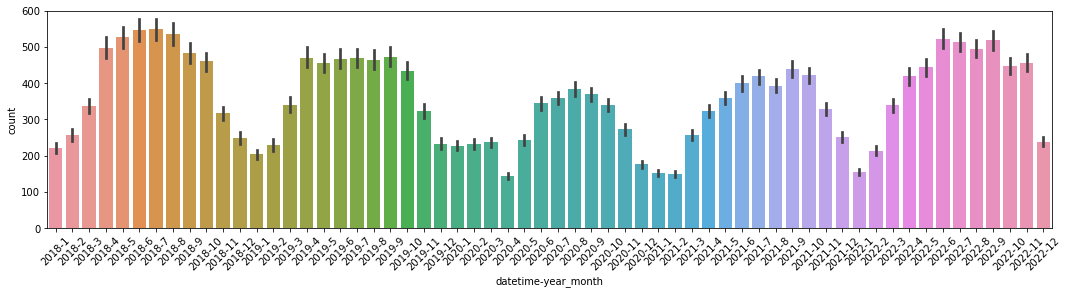

In [241]:
plt.figure(figsize=(18,4))
plt.xticks(rotation=45, fontsize=10)

sns.barplot(data=train, x='datetime-year_month', y='count').set(ylim=(0,600))

<AxesSubplot:xlabel='datetime-year_month', ylabel='casual'>

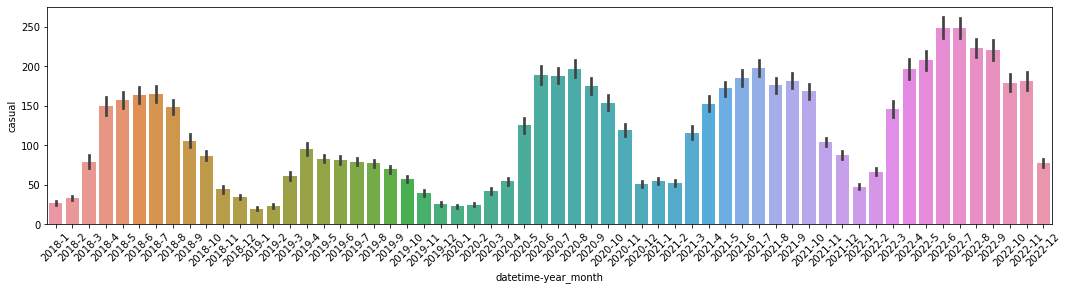

In [243]:
plt.figure(figsize=(18,4))
plt.xticks(rotation=45, fontsize=10)

sns.barplot(data=train, x='datetime-year_month', y='casual')

<AxesSubplot:xlabel='datetime-year_month', ylabel='registered'>

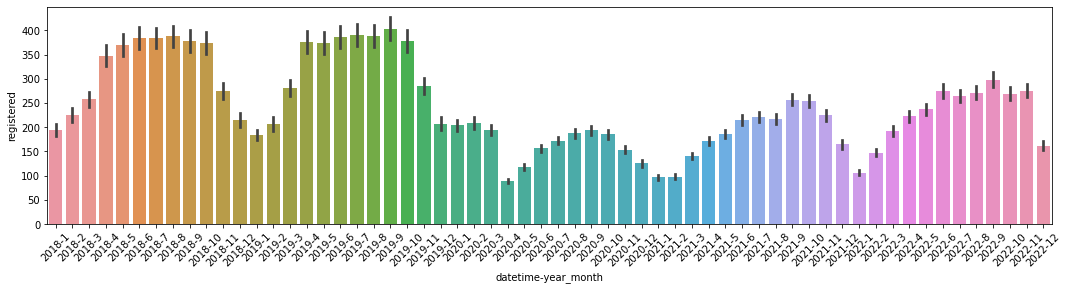

In [244]:
plt.figure(figsize=(18,4))
plt.xticks(rotation=45, fontsize=10)

sns.barplot(data=train, x='datetime-year_month', y='registered')

<AxesSubplot:xlabel='datetime-year_month', ylabel='casual'>

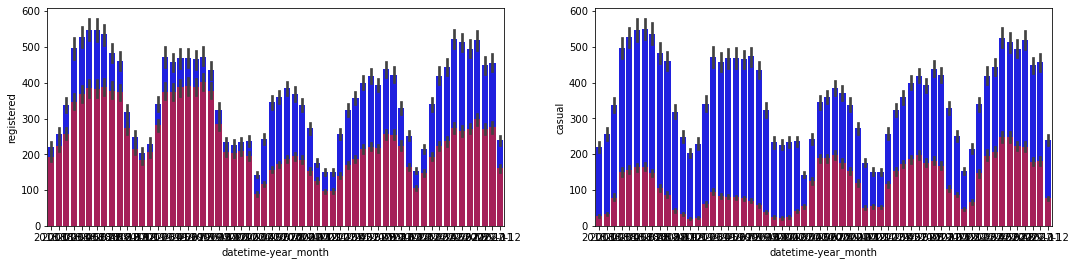

In [254]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.barplot(data=train, x='datetime-year_month', y='count', color = 'b')
sns.barplot(data=train, x='datetime-year_month', y='registered', color = 'r', alpha = 0.7)

plt.subplot(1,2,2)
sns.barplot(data=train, x='datetime-year_month', y='count', color = 'b')
sns.barplot(data=train, x='datetime-year_month', y='casual', color = 'r', alpha = 0.7)

### Q7-3) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1. 코로나19의 영향에도 불구하고 월별, 계절별 추이는 비슷한 형태입니다.

2. 전체 대여량(`count`)를 봤을 때 코로나19 이전만큼 회복된 것처럼 보이지만 회원(`registered`)는 이전만큼 회복하지 못했습니다.

3. 2020년 이후 회원이 많이 감소했지만 전체 이용률이 적은 겨울에는 그래도 회원의 비율이 높습니다.

### Q7-4) 이 사실을 통해 어떤 제안을 할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. 이용률이 전체적으로 떨어지는 시기인 겨울에도 안정적인 대여량을 유지하려면 회원을 증가시키기 위한 마케팅을 진행하는 게 좋겠습니다.

2. 비회원의 경우 2019년 봄을 기점으로 점차 감소하다가 코로나19 이후 대여량이 오히려 증가했습니다. 비회원은 주로 여가시간에 이용하는 것으로 나타났지만 추가적으로 인구통계학적 특성이나 이용 성향을 통해 코로나 시기 증가 원인을 파악하면 비회원 대상 마케팅에 활용해 볼 수 있을 것입니다. 또한 2019년 여름의 감소 원인을 파악하면 추후 비슷한 상황이 닥쳤을 때 대비하기 용이할 것입니다.

3. 회원, 비회원 별로 새로운 프로모션을 시작할 타이밍을 결정해볼 수 있겠습니다. 둘 다 비슷한 추이를 보이나 부분적으로 총량에서의 차이를 보입니다. 가령 출퇴근은 정상화된 현재 2023년 1월 시점에서는 회원의 대여량을 회복시키기 위한 프로모션을 바로 진행해 볼 수 있습니다.

---